1. Import packages

>tensorflow: TensorFlow is an open-source machine learning framework developed by Google. Some common use cases include:

-Creating tensors and performing operations on them using TensorFlow's computational graph.

-Building and training deep learning models using high-level APIs like Keras.

-Implementing custom machine learning algorithms using TensorFlow's lower-level APIs.

-Loading and preprocessing data for machine learning tasks.

-Evaluating and deploying trained models.

>keras: keras is a high-level neural networks API that is integrated into TensorFlow. It provides a user-friendly interface to define, configure, and train deep learning models.
  This includes the ability to define models using the Sequential API, create layers such as Dense, Conv2D, and LSTM, apply various activation functions, compile models with loss functions and optimizers, and train models using methods like fit.

Once you have imported keras from tensorflow, you can use its functionalities to build and train neural networks for various tasks like classification, regression, image recognition, and natural language processing.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras #keras is a high-level neural networks API that is integrated into TensorFlow. It provides a user-friendly interface to define, configure, and train deep learning models.
from keras.models import Sequential, load_model #The Sequential class is a linear stack of layers in a neural network model. It allows you to build a neural network by stacking layers on top of each other.
from keras.layers import Dense #The Dense class represents a fully connected layer in a neural network. It is the most common type of layer used in neural networks and is responsible for performing mathematical operations on the input data.
import matplotlib.pyplot as plt

%matplotlib inline

2. Neural Networks

2.1 Problem statement

Use a neural network to recognize two handwritten digits, zero and one

2.2 Dataset 

The dataset contains 1000 training examples of handwritten digits, here limited to zero and one

Each training example is a 20-pixal x 20-pixel grayscale image of the digit

 -Each pixel is represented by a floating point numper
 
 -20 by 20 grud of pixels is "unrolled" into a 400-dimensional vector
 
 -Each training example becomes a single row in our data matrix X

 -this give us a 1000x400 matrix

The second part of the training set is a 1000 x 1 dimensional vector y that contains labels for the training set
 
 y = 0 if the image is of the digit 0, y = 1 if the image is of the digit 1.

In [16]:
def load_data():
    X=np.load("data/X.npy")
    y=np.load("data/y.npy")
    X=X[0:1000]
    y=y[0:1000] #The purpose of slicing the arrays in this code snippet is to limit the dataset size to the first 1000 samples, potentially for faster testing or prototyping purposes.
    return X,y

In [17]:
X,y=load_data()

In [18]:
print('The first element of X is:',X[0])

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [19]:
print('The first element of y is:', y[0,0])
print('The last element of y is:', y[-1,0])

The first element of y is: 0
The last element of y is: 1


In [20]:
#Check the dimensions of the variavles
print('The shape of X is:'+str(X.shape))
print('The shape of y is:'+str(y.shape))

The shape of X is:(1000, 400)
The shape of y is:(1000, 1)


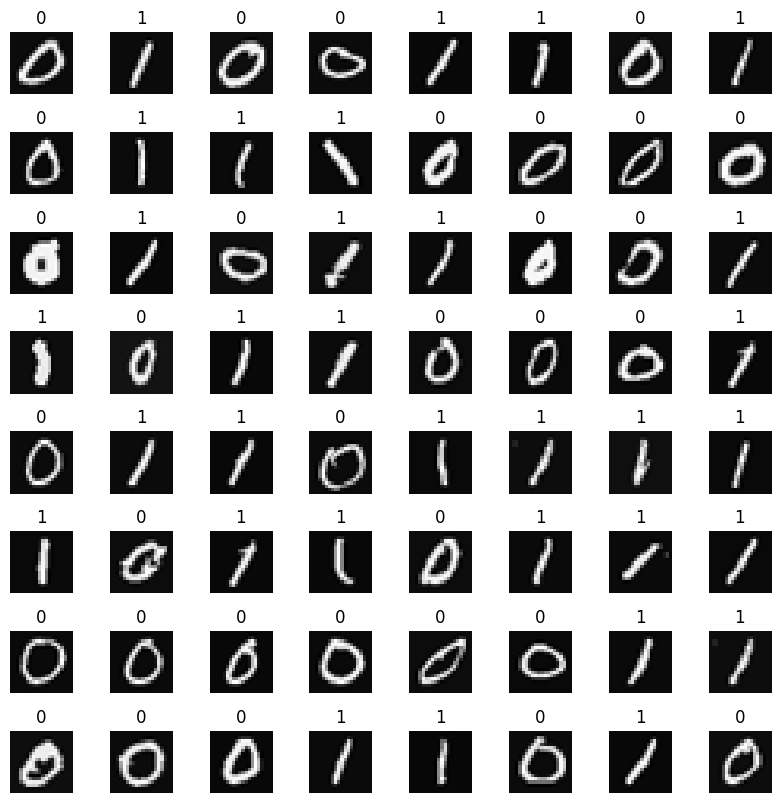

In [21]:
#Visualize the Data

m,n=X.shape

fig,axes=plt.subplots(8,8,figsize=(8,8)) 
fig.tight_layout(pad=0.1) #defines the distance between figures

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index=np.random.randint(m) #This line generates a random integer (random_index) between 0 and the number of samples (m). This is typically used to select a random data point from the dataset.
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped=X[random_index].reshape((20,20)).T # This line selects the data point at the randomly generated index (random_index) from the input data (X). The reshape() function is used to reshape the data point into a 20x20 matrix. The .T at the end performs a transpose operation, flipping the matrix along its diagonal.

    #Display image
    ax.imshow(X_random_reshaped,cmap='gray') #This line displays the reshaped and transposed data point (X_random_reshaped) in the current subplot (ax). The imshow() function is used to visualize the matrix as an image. The cmap='gray' parameter sets the colormap to grayscale, indicating that the image will be displayed in black and white.

    #Display the label above the image
    ax.set_title(y[random_index,0]) #0 is used to acess the firs column of y
    ax.set_axis_off() #take the axis off the plot


>fig,axes=plt.subplots(8,8,figsize=(8,8)): 
This line creates a figure (fig) and an array of subplots (axes). The subplots() function is called with the parameters 8 and 8, indicating that the grid of subplots will have 8 rows and 8 columns. 

The figsize parameter specifies the size of the figure in inches, where (8, 8) indicates a width and height of 8 inches. The resulting figure and subplots are assigned to the variables fig and axes, respectively.

>fig.tight_layout(pad=0.1): This line adjusts the spacing between the subplots to optimize their arrangement. The tight_layout() function automatically adjusts the positions of axes and labels within the figure, preventing overlap.

 The pad parameter specifies the padding between the subplots, and a value of 0.1 indicates a padding of 0.1 inches. By calling tight_layout(), the spacing between subplots is optimized to minimize any overlaps or excessive gaps.


In [22]:
model=Sequential(
    [
        tf.keras.Input(shape=(400,)),
        tf.keras.layers.Dense(25,activation="sigmoid"),
        tf.keras.layers.Dense(15,activation="sigmoid"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ], name="my_model"
)

In [23]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


Explanation of the output:

In the dense layer, the output shape is (None, 25) which means it has 25 neurons. The total number of parameters in this layer is calculated as 25 (neurons) * 400 (input shape) + 25 (biases) = 10,025. 

Similarly, for the dense_1 layer, the output shape is (None, 15), and it has 15 * 25 + 15 = 390 parameters.

The last dense_2 layer has an output shape of (None, 1) because it is the final output layer of the network, responsible for binary classification (0 or 1). It has 1 * 15 + 1 = 16 parameters.

By performing the next calculations, you can determine the total number of parameters in each layer, which helps in understanding the complexity and size of the neural network model.

In [24]:
L1_num_params=40*25+25 #W1 parameters + b1 parameters
L2_num_params=25*15+15 #W2 parameters + b2 parameters
L3_num_params=15*1+1 #W3 parameters + b3 parameters
print("L1 params=", L1_num_params, ",L2 params=",L2_num_params,",L3 params=",L3_num_params)

L1 params= 1025 ,L2 params= 390 ,L3 params= 16


model.layers is a property of a Keras model object that returns a list of all the layers in the model. This list contains the individual layer objects that make up the neural network model.

By using the line of code [layer1, layer2, layer3] = model.layers, the list of layers returned by model.layers is being unpacked into three separate variables: layer1, layer2, and layer3.  
 Each of these variables will hold a reference to a specific layer object in the model. This allows you to conveniently access and manipulate individual layers in the model.  
 For example, you can access properties and methods specific to each layer, modify layer parameters, or connect layers in a custom way.

Note that the names layer1, layer2, and layer3 used in the code snippet are arbitrary and can be replaced with any valid variable names.



In [25]:
[layer1,layer2,layer3]=model.layers

In [26]:
W1,b1=layer1.get_weights() #This line retrieves the weights and biases of the first layer (layer1) using the get_weights() method.
W2,b2=layer2.get_weights()
W3,b3=layer3.get_weights()

print(f"W1 shape={W1.shape},b1 shape={b1.shape}")
print(f"W2 shape= {W2.shape},b2 shape={b2.shape}")
print(f"W3 shape={W3.shape},b3 shape={b3.shape}")

W1 shape=(400, 25),b1 shape=(25,)
W2 shape= (25, 15),b2 shape=(15,)
W3 shape=(15, 1),b3 shape=(1,)


In [27]:
print(model.layers[2].weights) #prints the weights of the third layer (layer3) in the model

[<tf.Variable 'dense_5/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.16921163],
       [ 0.12442565],
       [ 0.45053297],
       [ 0.16138726],
       [ 0.3525027 ],
       [ 0.21147364],
       [-0.08555031],
       [ 0.41205508],
       [-0.01954269],
       [ 0.50404173],
       [-0.31710404],
       [-0.37763882],
       [-0.5605675 ],
       [-0.5842038 ],
       [ 0.18688768]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data.

model.compile() is used to configure the model for training.  
  loss=tf.keras.losses.BinaryCrossentropy() sets the loss function to binary cross-entropy, which is commonly used for binary classification problems.  
  optimizer=tf.keras.optimizers.Adam(0.001) sets the optimizer to Adam with a learning rate of 0.001. Adam is an optimization algorithm that adapts the learning rate during training to improve convergence.


model.fit() is used to train the model on a given dataset. It takes the input data X and target labels y as arguments, along with other optional parameters like the number of epochs (iterations over the dataset). In this case:

  X is the input data.
  y is the target labels.
  epochs=20 specifies that the training process will iterate over the entire dataset 20 times.

By calling model.fit(), the model will be trained on the provided data using the specified loss function and optimizer.

The training process involves adjusting the model's weights based on the provided data to minimize the loss function. 

After training completes, the model will have learned to make predictions on similar data.

In [28]:
model.compile(  
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(X,y,
          epochs=20
)

Epoch 1/20


32/32 [==============================] - 1s 2ms/step - loss: 0.6223
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4596
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2110
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1528
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1170
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0937
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 13/20
32/32 [==============================] - 0s 1ms/

To run the model on an example to make a prediction, use Keras predict.

The [0] and [500] are used to access specific elements from the X array, representing different input samples. 

The "prediction" variable holds the output of the model, which represents the probability of the input belonging to class 1.

The output of the following code will be:  
   - The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero.   
   - In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one

In [40]:
prediction=model.predict(X[50].reshape(1,400))  #generates a prediction for the reshaped input (at index 0 of array X) using the trained model. X[0] selects the input at index 0 from the X array. .reshape(1, 400) reshapes the selected input to have a shape of (1, 400), indicating a single sample with 400 dimensions.
print(f"predicting a zero: {prediction}")

prediction=model.predict(X[500].reshape(1,400))
print(f"predicting a one:{prediction}")

1/1 [==============================] - 0s 22ms/step
predicting a zero: [[0.01915796]]
1/1 [==============================] - 0s 20ms/step
predicting a one:[[0.9886153]]


As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [42]:
if prediction >=0.5:
    yhat=1
else:
    yhat=0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 [==============================] - 0s 18ms/step


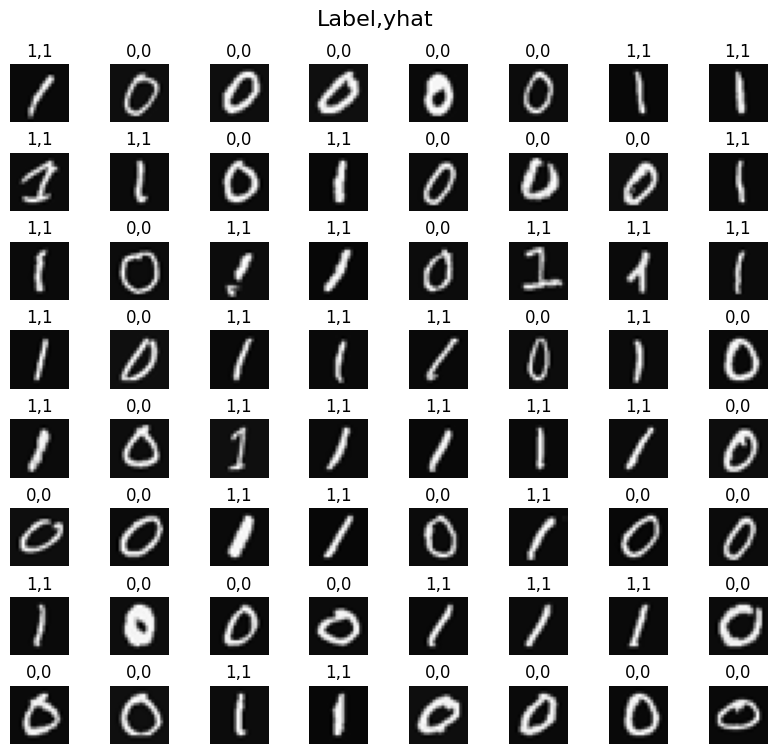

In [44]:
m,n=X.shape

fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0,0.03,1,0.92])

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index=np.random.randint(m) #This line generates a random integer (random_index) between 0 and the number of samples (m). This is typically used to select a random data point from the dataset.

    X_random_reshaped=X[random_index].reshape((20,20)).T # This line selects the data point at the randomly generated index (random_index) from the input data (X). The reshape() function is used to reshape the data point into a 20x20 matrix. The .T at the end performs a transpose operation, flipping the matrix along its diagonal.

    ax.imshow(X_random_reshaped,cmap='gray') #This line displays the reshaped and transposed data point (X_random_reshaped) in the current subplot (ax).

    # Predict using the Neural Network
    prediction=model.predict(X[random_index].reshape(1,400))
    if prediction>=0.5:
        yhat=1
    else:
        yhat=0
    
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()

fig.suptitle("Label,yhat",fontsize=16) #write the title on the top of the plot|| fontsize defines the size of the letters written
plt.show()

